#  Performance Comparison on Iris Flower Species Classification




 * Implemented Perceptron Learning Rule and Gradient Descent Delta Rule from
scratch to classify Iris flower species, using an 80/20 train
test split for evaluation. Compared model accuracy across different activation functions and learning rates, analyzing how each algorithm
 performs and adapts to the dataset.

 * Experimented with hyperparameter tuning to minimize loss and improve prediction accuracy, documenting results and insights for both
 models.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Task 1: Implement Perceptron Learning Rule and Gradient Descent Delta Rule
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

class GradientDescent:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def fit(self, X, y):
        self.weights = 2 * np.random.random((X.shape[1], 1)) - 1
        self.bias = 2 * np.random.random(1) - 1
        self.errors_ = []

        for _ in range(self.epochs):
            output = self.sigmoid(np.dot(X, self.weights) + self.bias)
            errors = y.reshape(-1, 1) - output
            self.weights += self.learning_rate * np.dot(X.T, errors * self.sigmoid_derivative(output))
            self.bias += self.learning_rate * np.sum(errors * self.sigmoid_derivative(output))
            self.errors_.append(np.mean(errors))
        return self

    def predict(self, X):
        return np.where(self.sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5, 1, 0)


In [2]:

# Task 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Task 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Task 4: Instantiate and train the models
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

gradient_descent = GradientDescent()
gradient_descent.fit(X_train, y_train)

In [5]:
# Task 5: Evaluate models on test set
perceptron_accuracy = np.mean(perceptron.predict(X_test) == y_test)
gradient_descent_accuracy = np.mean(gradient_descent.predict(X_test) == y_test)

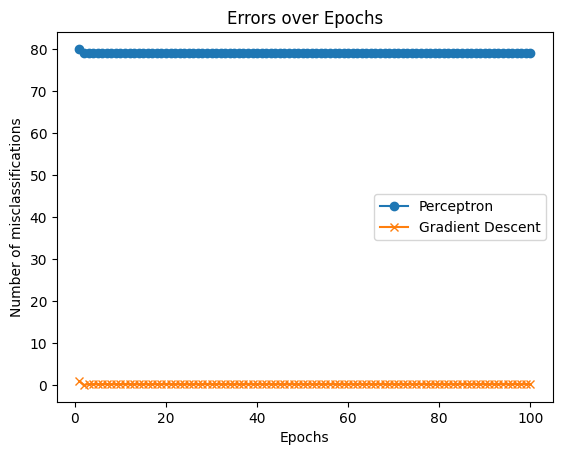

In [6]:
# Task 6: Plot the errors over epochs
plt.plot(range(1, len(perceptron.errors_)+1), perceptron.errors_, marker='o', label='Perceptron')
plt.plot(range(1, len(gradient_descent.errors_)+1), gradient_descent.errors_, marker='x', label='Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Errors over Epochs')
plt.legend()
plt.show()

In [7]:
# Output the results
print("\nTask 1: Perceptron Learning Rule and Gradient Descent Delta Rule Implemented")
print("Perceptron Weights:", perceptron.weights)
print("Gradient Descent Weights:", gradient_descent.weights)
print("\nTask 2: Iris dataset loaded")
print("Features (first 5 rows):\n", X[:5])
print("Targets (first 5 elements):", y[:5])
print("\nTask 3: Data split into training and testing sets (80/20)")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\nTask 4: Models trained")
print("Perceptron Errors over Epochs:", perceptron.errors_)
print("Gradient Descent Errors over Epochs:", gradient_descent.errors_)
print("\nTask 5: Model accuracies on test set:")
print("Perceptron Accuracy:", perceptron_accuracy)
print("Gradient Descent Accuracy:", gradient_descent_accuracy)
print("\nTask 6: Errors over epochs plotted at the beginning")


Task 1: Perceptron Learning Rule and Gradient Descent Delta Rule Implemented
Perceptron Weights: [ -0.92   55.616 -22.118 157.46   68.234]
Gradient Descent Weights: [[-0.50299643]
 [-0.98948955]
 [ 1.86340934]
 [ 1.15483043]]

Task 2: Iris dataset loaded
Features (first 5 rows):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Targets (first 5 elements): [0 0 0 0 0]

Task 3: Data split into training and testing sets (80/20)
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)

Task 4: Models trained
Perceptron Errors over Epochs: [80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,